<a href="https://colab.research.google.com/github/cyanidekawaii/iit_intern/blob/main/Distribution_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding distributions that fit our data ~

*What are probability distributions and how can we use them?*

Probability distributions are functions that give the probabilities of occurrence of different possible outcomes for an experiment [4]. They help to model our world, enabling us to obtain estimates of the probability that a certain event may occur, or estimate the variability of occurence [5].

*What is distribution fitting?*

Distribution fitting is the process used to select a statistical distribution that best fits the data. The aim of distribution fitting is to predict the probability or to forecast the frequency of occurrence of the magnitude of the phenomenon in a certain interval [6].

In layman terms, we fit distributions to compress our data into a model, making it easier to make predictions. We can reduce the observational data to a small number of parameters such as mean and variance. We can then use known properties of our fitted distribution to predict, for example, how likely we are to find a new observation above or below a particular value.


Instead of estimating parameters for each possible distribution one by one, we can find the best distribution that fits our data using libraries like fitter [7] and distfit [8].

In [ ]:
#installing and importing libraries
!pip install fitter
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

In [ ]:
#generating data with gamma distribution
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)

Running an instance of Fitter

The Fitter class in the backend uses the Scipy library which supports 80 distributions. The Fitter class scans all of them, call the fit function, ignoring those that fail or run forever and finally give you a summary of the best distributions in the sense of sum of the square errors [7].

The fitting takes time by default, since it goes through each one of the 80 distributions to see which fits best. We can provide a number of distributions we think might fit the data (by plotting it) instead of letting fitter go through each distribution on its own to save run time.

Fitting 4 distributions: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.001214,1137.160891,-159202.075947,inf,0.007898,5.581787e-01
gamma,0.001222,1134.537568,-159151.399761,inf,0.007969,5.464562e-01
invweibull,0.005000,1022.987097,-145059.141456,inf,0.023142,4.388654e-05
norm,0.060546,2085.273397,-120128.510753,inf,0.100459,2.613920e-88


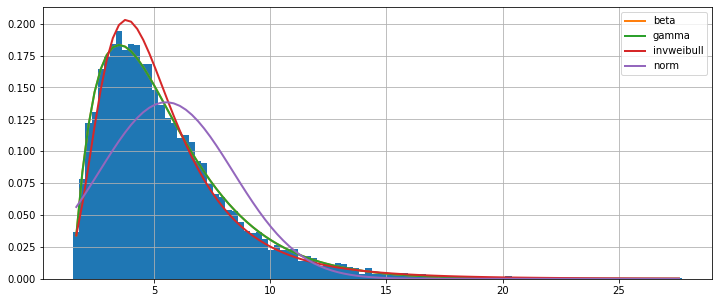

In [ ]:
from fitter import Fitter
f = Fitter(data,distributions=['gamma',
                          "beta",
                          "norm","invweibull"])
f.fit()
f.summary()

What are AIC and BIC values?

-AIC and BIC are widely used in model selection criteria. AIC means Akaike’s Information Criteria and BIC means Bayesian Information Criteria. The AIC can be termed as a *mesaure of the goodness of fit of any estimated statistical model*. The BIC is a *type of model selection among a class of parametric models with different numbers of parameters* [9].

-The AIC tries to select the model that most adequately describes an unknown, high dimensional reality. This means that reality is never in the set of candidate models that are being considered. On the contrary, BIC tries to find the TRUE model among the set of candidates

At first glance, we see at least two to three distributions that fit well. We'll need something quantitative to find which distribution fits our data the best. sumsquare_error, aic and bic values are what we look at here. We find that it indeed is the gamma distribution that fits the best, which was exactly the data distribution that we generated.

In [ ]:
from fitter import get_distributions
len(get_distributions())#a list of all the possible distributions fitter goes through

106

we can choose the best distribution according to any one of the available parameters. Eg. sumsquare_error, aic, bic values etc.

In [ ]:
f.get_best(method = 'sumsquare_error')#the best distribution according to sumsquare_error

{'beta': {'a': 1.9864827505245741,
  'b': 121185.45559828822,
  'loc': 1.5107153111835259,
  'scale': 244490.93968276161}}

In [ ]:
f.fitted_param["gamma"]#parameters of the fitted distribution

(1.9848676752586405, 1.5108443288278561, 2.0196339995431005)